# C1 Load Dataset

abalone dataset

In [213]:
from libsvm.svmutil import *
import numpy as np
import pandas as pd
from sklearn.datasets import dump_svmlight_file
# train_test_split
from sklearn.model_selection import train_test_split
import math

In [12]:
y, x = svm_read_problem('./cached_datasets/abalone', return_scipy=True)

In [13]:
y.shape

(4177,)

In [14]:
x.shape

(4177, 8)

In [15]:
3133 + 1044 == 4177

True

## Split dataset

In [16]:
train_size = 3133
test_size = 1044
train_x = x[:train_size]
train_y = y[:train_size]
test_x = x[-test_size:]
test_y = y[-test_size:]

In [17]:
dump_svmlight_file(X=train_x, y=train_y, f='./cached_datasets/abalone_train', zero_based=True)

In [18]:
dump_svmlight_file(X=test_x, y=test_y, f='./cached_datasets/abalone_test', zero_based=True)

# C2 Scale the Data
Use the libsvm scaling tool to scale the features of all the data. Use the first 3133 examples for training, the last 1044 for testing. The scaling parameters should be computed only on the training data and then applied to the test data.

In [19]:
!svm-scale -s ./cached_datasets/train_range ./cached_datasets/abalone_train

/bin/zsh: /home/xiangpan/.conda/envs/39/lib/libncursesw.so.6: no version information available (required by /bin/zsh)
15 0:-1 1:0.027027 2:0.0420168 3:-0.831858 4:-0.63733 5:-0.699395 6:-0.735352 7:-0.704036 
7 0:-1 1:-0.256757 2:-0.294118 3:-0.840708 4:-0.841686 5:-0.867518 6:-0.873601 7:-0.863478 
9 1:0.22973 2:0.226891 3:-0.761062 4:-0.52187 5:-0.656355 6:-0.628703 7:-0.584454 
10 0:-1 1:-0.0135135 2:0.0420168 3:-0.778761 4:-0.635913 5:-0.7115 6:-0.701119 7:-0.694071 
7 0:1 1:-0.310811 2:-0.327731 3:-0.858407 4:-0.856207 5:-0.880968 6:-0.897301 7:-0.893373 
8 0:1 1:-0.0540541 2:-0.176471 3:-0.831858 4:-0.752435 5:-0.811701 6:-0.797235 7:-0.763827 
20 1:0.22973 2:0.210084 3:-0.734513 4:-0.450682 5:-0.682582 6:-0.628703 7:-0.345291 
16 1:0.27027 2:0.243697 3:-0.778761 4:-0.457411 5:-0.605918 6:-0.607637 7:-0.484803 
9 0:-1 1:0.0810811 2:0.0588235 3:-0.778761 4:-0.640517 5:-0.710155 6:-0.705069 7:-0.674141 
19 1:0.283784 2:0.294118 3:-0.734513 4:-0.367806 5:-0.578346 6:-0.603687 7:-0.3

In [20]:
!svm-scale -r ./cached_datasets/train_range  ./cached_datasets/abalone_train >  ./cached_datasets/abalone_train_scaled

/bin/zsh: /home/xiangpan/.conda/envs/39/lib/libncursesw.so.6: no version information available (required by /bin/zsh)


In [21]:
!svm-scale -r ./cached_datasets/train_range  ./cached_datasets/abalone_test >  ./cached_datasets/abalone_test_scaled

/bin/zsh: /home/xiangpan/.conda/envs/39/lib/libncursesw.so.6: no version information available (required by /bin/zsh)


In [22]:
train_y_scaled, train_x_scaled = svm_read_problem('./cached_datasets/abalone_train_scaled', return_scipy=True)

In [23]:
test_y_scaled, test_x_scaled = svm_read_problem('./cached_datasets/abalone_test_scaled', return_scipy=True)

In [24]:
# distinguishing classes 1 through 9 from the rest
train_y_scaled = (train_y_scaled<=9).astype(int)

In [25]:
test_y_scaled = (test_y_scaled<=9).astype(int)

In [26]:
dump_svmlight_file(X=train_x_scaled, y=train_y_scaled, f='./cached_datasets/abalone_train_scaled', zero_based=True)

In [27]:
dump_svmlight_file(X=test_x_scaled, y=test_y_scaled, f='./cached_datasets/abalone_test_scaled', zero_based=True)

# C3
Consider the binary classification that consists of distinguishing classes 1 through 9 from the rest. Use SVMs combined with polynomial kernels to tackle this binary classification problem.

To do that, randomly split the training data into five equal-sized disjoint sets. For each value of the polynomial degree, d = 1,2,3,4,5, plot the average cross-validation error plus or minus one standard deviation as a function of C (let other parameters of polynomial kernels in libsvm be equal to their default values), varying C in powers of 3, starting from a small value C = 3 −k to C = 3 k , for some value of k. k should be chosen so that you see a significant variation in training error, starting from a very high training error to a low training error. Expect longer training times with libsvm as the value of C increases.

In [17]:
train_y_scaled, train_x_scaled = svm_read_problem('./cached_datasets/abalone_train_scaled')
test_y_scaled, test_x_scaled = svm_read_problem('./cached_datasets/abalone_test_scaled')

In [214]:
C = [math.pow(3,i) for i in range(-10, 10)]

In [29]:


acc_res = []
var_res = []

for c in C:
    # polynomial kernel
    p_acc_list = []
    p_acc_var_list = []
    for d in range(1,6):
        t_acc = []
        for i in range(5):
            # split train val
            train_x_scaled_, val_x_scaled, train_y_scaled_, val_y_scaled = train_test_split(train_x_scaled, train_y_scaled, test_size=0.2)

            m = svm_train(train_y_scaled_, train_x_scaled_, f'-t 1 -c {c} -d {d} -q')
            p_label, p_acc, p_val = svm_predict(val_y_scaled, val_x_scaled, m)
            t_acc += [p_acc[0]]
        p_acc_list += [sum(t_acc)/5]
        p_acc_var_list += [np.var(t_acc)]
    acc_res = acc_res + [p_acc_list]
    var_res = var_res + [p_acc_var_list]
    print(c)

Accuracy = 51.3557% (322/627) (classification)
Accuracy = 50.5582% (317/627) (classification)
Accuracy = 52.7911% (331/627) (classification)
Accuracy = 44.3381% (278/627) (classification)
Accuracy = 52.9506% (332/627) (classification)
Accuracy = 50.3987% (316/627) (classification)
Accuracy = 53.5885% (336/627) (classification)
Accuracy = 51.1962% (321/627) (classification)
Accuracy = 48.8038% (306/627) (classification)
Accuracy = 50.0797% (314/627) (classification)
Accuracy = 53.11% (333/627) (classification)
Accuracy = 50.8772% (319/627) (classification)
Accuracy = 49.6013% (311/627) (classification)
Accuracy = 51.1962% (321/627) (classification)
Accuracy = 48.0064% (301/627) (classification)
Accuracy = 50.7177% (318/627) (classification)
Accuracy = 51.5152% (323/627) (classification)
Accuracy = 54.8644% (344/627) (classification)
Accuracy = 52.4721% (329/627) (classification)
Accuracy = 49.1228% (308/627) (classification)
Accuracy = 51.3557% (322/627) (classification)
Accuracy = 53.9

Accuracy = 80.8612% (507/627) (classification)
Accuracy = 77.3525% (485/627) (classification)
Accuracy = 80.8612% (507/627) (classification)
Accuracy = 81.4992% (511/627) (classification)
Accuracy = 79.5853% (499/627) (classification)
Accuracy = 79.4258% (498/627) (classification)
Accuracy = 81.3397% (510/627) (classification)
Accuracy = 79.2663% (497/627) (classification)
Accuracy = 79.1069% (496/627) (classification)
Accuracy = 81.0207% (508/627) (classification)
Accuracy = 81.1802% (509/627) (classification)
Accuracy = 83.4131% (523/627) (classification)
Accuracy = 79.1069% (496/627) (classification)
Accuracy = 80.0638% (502/627) (classification)
Accuracy = 76.7145% (481/627) (classification)
Accuracy = 79.2663% (497/627) (classification)
Accuracy = 82.2967% (516/627) (classification)
Accuracy = 78.4689% (492/627) (classification)
Accuracy = 80.3828% (504/627) (classification)
Accuracy = 80.0638% (502/627) (classification)
Accuracy = 81.0207% (508/627) (classification)
19683.0


In [30]:
acc_res = np.array(acc_res)

In [31]:
acc_res = acc_res.T

In [32]:
acc_res.shape

(5, 20)

In [33]:
acc_res.max()

81.18022328548645

In [34]:
acc_res

array([[50.39872408, 51.32376396, 52.28070175, 51.54704944, 50.43062201,
        71.6108453 , 71.16427432, 72.91866029, 73.42902711, 75.05582137,
        77.16108453, 78.53269537, 78.97926635, 79.90430622, 79.33014354,
        79.64912281, 79.55342903, 79.5215311 , 78.91547049, 79.90430622],
       [50.81339713, 50.14354067, 55.50239234, 51.45135566, 49.79266348,
        62.32854864, 71.51515152, 72.63157895, 72.08931419, 74.70494418,
        74.16267943, 77.63955343, 78.34130781, 80.60606061, 79.71291866,
        79.29824561, 79.87240829, 80.54226475, 80.76555024, 79.74481659],
       [50.55821372, 50.07974482, 51.00478469, 51.06858054, 50.74960128,
        50.04784689, 66.66666667, 72.12121212, 74.35406699, 74.1307815 ,
        74.35406699, 74.54545455, 77.73524721, 77.89473684, 79.55342903,
        80.98883573, 80.4784689 , 80.4784689 , 81.18022329, 80.38277512],
       [51.738437  , 51.22807018, 50.7814992 , 51.77033493, 51.77033493,
        49.6969697 , 65.29505582, 68.3891547 , 7

In [35]:
from numpy import unravel_index
unravel_index(acc_res.argmax(), acc_res.shape)

(2, 18)

In [37]:
c_star_index = unravel_index(acc_res.argmax(), acc_res.shape)[1]
c_star = C[unravel_index(acc_res.argmax(), acc_res.shape)[1]]

d_star = unravel_index(acc_res.argmax(), acc_res.shape)[0] + 1

In [38]:
print(c_star, d_star)

6561.0 3


In [39]:
print(f"The best pair is d = {d_star}, and C = {c_star}. (C*, d*) = ({c_star}, {d_star})")

The best pair is d = 3, and C = 6561.0. (C*, d*) = (6561.0, 3)


Text(18.5, 81.68022328548645, '6561.0')

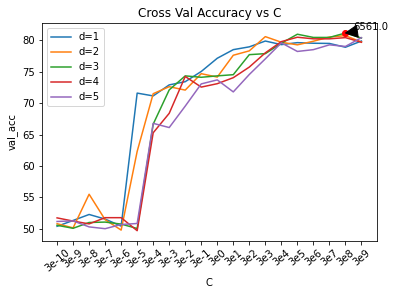

In [43]:
# plot p_acc_list vs C for each d with subplot
import matplotlib.pyplot as plt
res = acc_res

for i in range(len(res)):
    # plt.figure(figsize=(20,20))
    # plt.subplot(5,10,i+1)
    plt.plot(res[i])
plt.legend(['d=1', 'd=2', 'd=3', 'd=4', 'd=5'])

# plt.plot(p_acc_list)
plt.title('Cross Val Accuracy vs C')
plt.xlabel('C')
plt.ylabel('val_acc')
plt.xticks([i for i in range(20)],[f"3e{i}" for i in range(-10, 10)], rotation=40)
# mark max
plt.plot(c_star_index, res.max(), 'ro')
# max lengend
plt.annotate(f'{c_star}', xy=(c_star_index, res.max()), xytext=(c_star_index+0.5, res.max()+0.5), arrowprops=dict(facecolor='black', shrink=0.01))

In [49]:
100 - res.max()

18.81977671451355

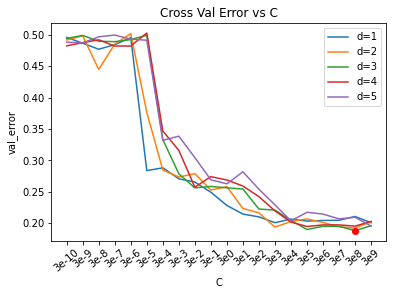

In [71]:
# plot p_acc_list vs C for each d with subplot
import matplotlib.pyplot as plt
res = acc_res

for i in range(len(res)):
    # plt.figure(figsize=(20,20))
    # plt.subplot(5,10,i+1)
    plt.plot((100 - res[i])/100)
plt.legend(['d=1', 'd=2', 'd=3', 'd=4', 'd=5'])

# plt.plot(p_acc_list)
plt.title('Cross Val Error vs C')
plt.xlabel('C')
plt.ylabel('val_error')
plt.xticks([i for i in range(20)],[f"3e{i}" for i in range(-10, 10)], rotation=40)
# mark max
plt.plot(c_star_index, (100 - res.max())/100, 'ro')
# max lengend
plt.annotate(f'{c_star}', xy=(c_star_index, res.max()), xytext=(c_star_index+0.5, 100 - res.max()+0.5), arrowprops=dict(facecolor='black', shrink=0.01))
plt.savefig("./images/C3_cross_val_error_vs_d")

In [63]:
var_res = np.array(var_res)

In [65]:
var_res = var_res.T

In [67]:
var_res.shape

(5, 20)

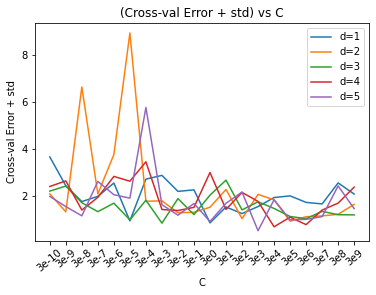

In [73]:
# plot p_acc_list vs C for each d with subplot
import matplotlib.pyplot as plt
res = acc_res

for i in range(len(res)):
    # plt.figure(figsize=(20,20))
    # plt.subplot(5,10,i+1)
    plt.plot((100 - res[i])/100 + np.sqrt(var_res[i]))
plt.legend(['d=1', 'd=2', 'd=3', 'd=4', 'd=5'])

# plt.plot(p_acc_list)
plt.title('(Cross-val Error + std) vs C')
plt.xlabel('C')
plt.ylabel('Cross-val Error + std')
plt.xticks([i for i in range(20)],[f"3e{i}" for i in range(-10, 10)], rotation=40)
# mark max
# plt.plot(c_star_index, (100 - res.max())/100, 'ro')
# max lengend
# plt.annotate(f'{c_star}', xy=(c_star_index, res.max()), xytext=(c_star_index+0.5, 100 - res.max()+0.5), arrowprops=dict(facecolor='black', shrink=0.01))
plt.savefig("./images/C3_cross_val_error_plus_std_vs_d")

# C4
Let (C ∗,d ∗) be the best pair found previously. Fix C to be C ∗. Plot the five-fold cross-validation error and the test errors for the hypotheses obtained as a function of d. Plot the average number of support vectors obtained as a function of d. How many of the support vectors lie on the margin hyperplanes?

In [74]:
c_star = C[unravel_index(res.argmax(), res.shape)[1]]
d_star = unravel_index(res.argmax(), res.shape)[0] + 1

In [75]:
c_star

6561.0

In [76]:
d_star

3

In [205]:
c_star = 6561
d_star = 3

In [206]:
# list save result

val_acc_res = []
test_acc_res = []
sv_counts_res = []
for d in range(1,6):
    val_acc_list = []
    test_acc_list = []
    sv_counts_list = []
    m_list = []
    for fold in range(5):
        # split train val
        train_x_scaled_, val_x_scaled, train_y_scaled_, val_y_scaled = train_test_split(train_x_scaled, train_y_scaled, test_size=0.2)

        m = svm_train(train_y_scaled_, train_x_scaled_, f'-t 1 -c {c_star} -d {d} -q')
        sv_len = m.get_sv_indices()
        sv_counts_list += [len(sv_len)]
        p_label, p_acc, p_val = svm_predict(val_y_scaled, val_x_scaled, m)
        val_acc_list += [p_acc[0]]
        p_label, p_acc, p_val = svm_predict(test_y_scaled, test_x_scaled, m)
        test_acc_list += [p_acc[0]]
        # get sup vec counts
        
    val_acc_res += [sum(val_acc_list)/5]
    test_acc_res += [sum(test_acc_list)/5]
    sv_counts_res += [sum(sv_counts_list)/5]

Accuracy = 78.9474% (495/627) (classification)
Accuracy = 77.3946% (808/1044) (classification)
Accuracy = 76.0766% (477/627) (classification)
Accuracy = 77.3946% (808/1044) (classification)
Accuracy = 77.6715% (487/627) (classification)
Accuracy = 77.3946% (808/1044) (classification)
Accuracy = 81.3397% (510/627) (classification)
Accuracy = 77.682% (811/1044) (classification)
Accuracy = 80.3828% (504/627) (classification)
Accuracy = 77.4904% (809/1044) (classification)
Accuracy = 83.0941% (521/627) (classification)
Accuracy = 78.5441% (820/1044) (classification)
Accuracy = 82.6156% (518/627) (classification)
Accuracy = 78.5441% (820/1044) (classification)
Accuracy = 80.0638% (502/627) (classification)
Accuracy = 78.8314% (823/1044) (classification)
Accuracy = 79.2663% (497/627) (classification)
Accuracy = 79.2146% (827/1044) (classification)
Accuracy = 78.4689% (492/627) (classification)
Accuracy = 79.023% (825/1044) (classification)
Accuracy = 81.6587% (512/627) (classification)
Accur

In [207]:
val_acc_res

[78.8835725677831,
 80.7017543859649,
 80.92503987240829,
 80.92503987240829,
 79.42583732057417]

([<matplotlib.axis.XTick at 0x7f6cea646370>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

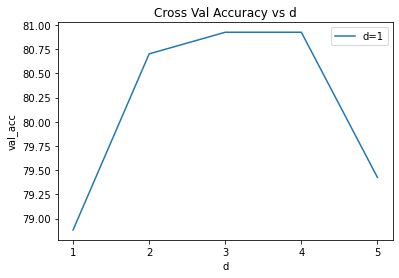

In [208]:
# plot val_acc as function of d
import matplotlib.pyplot as plt
plt.plot(val_acc_res)
plt.legend(['d=1', 'd=2', 'd=3', 'd=4', 'd=5'])
plt.title('Cross Val Accuracy vs d')
plt.xlabel('d')
plt.ylabel('val_acc')
plt.xticks([i for i in range(5)],[f"{i}" for i in range(1,6)])

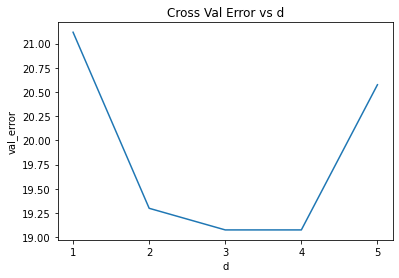

In [209]:
# plot val error as function of d
import matplotlib.pyplot as plt
val_acc_res = np.array(val_acc_res)
plt.plot(100-val_acc_res)
# plt.legend(['d=1', 'd=2', 'd=3', 'd=4', 'd=5'])
plt.title('Cross Val Error vs d')
plt.xlabel('d')
plt.ylabel('val_error')
plt.xticks([i for i in range(5)],[f"{i}" for i in range(1,6)])
plt.savefig("./images/C4_cross_val_error_vs_d")

([<matplotlib.axis.XTick at 0x7f6cea6e92b0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

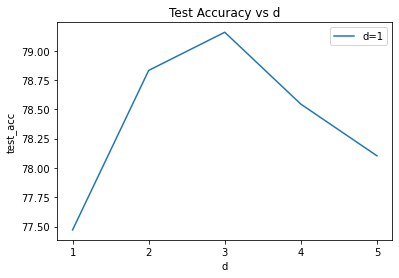

In [210]:
# plot val_acc as function of d
import matplotlib.pyplot as plt
plt.plot(test_acc_res)
plt.legend(['d=1', 'd=2', 'd=3', 'd=4', 'd=5'])
plt.title('Test Accuracy vs d')
plt.xlabel('d')
plt.ylabel('test_acc')
plt.xticks([i for i in range(5)],[f"{i}" for i in range(1,6)])

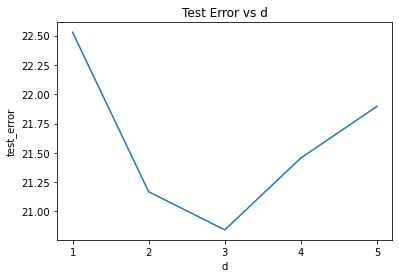

In [211]:
# plot test error as function of d
import matplotlib.pyplot as plt
test_acc_res = np.array(test_acc_res)
plt.plot(100-test_acc_res)
# plt.legend(['d=1', 'd=2', 'd=3', 'd=4', 'd=5'])
plt.title('Test Error vs d')
plt.xlabel('d')
plt.ylabel('test_error')
plt.xticks([i for i in range(5)],[f"{i}" for i in range(1,6)])
plt.savefig("./images/C4_test_error_vs_d")

## Support Vector Counts

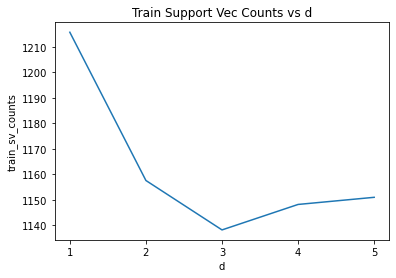

In [86]:
# plot
import matplotlib.pyplot as plt
plt.plot(sv_counts_res)
# plt.legend(['d=1', 'd=2', 'd=3', 'd=4', 'd=5'])
plt.title('Train Support Vec Counts vs d')
plt.xlabel('d')
plt.ylabel('train_sv_counts')
plt.xticks([i for i in range(5)],[f"{i}" for i in range(1,6)])
plt.savefig("./images/c4_train_sv_counts")

# C5
Fix (C,d) to be (C ∗,d ∗). Plot the training and test errors as a function of the training sample.

In [1]:
c_star = C[unravel_index(res.argmax(), res.shape)[1]]
d_star = unravel_index(res.argmax(), res.shape)[0] + 1

NameError: name 'C' is not defined

In [8]:
train_y_scaled, train_x_scaled = svm_read_problem('./cached_datasets/abalone_train_scaled')
test_y_scaled, test_x_scaled = svm_read_problem('./cached_datasets/abalone_test_scaled')

In [9]:
ratio_val_res = []
ratio_test_res = []
for ratio in np.arange(0.1, 1.1, 0.1):
    val_acc_list = []
    test_acc_list = []
    # ratio = round(i, 1)
    # train_num = int(len(train_x_scaled)*ratio)
    drop_size = 1 - ratio
    print(ratio)
    print(f"drop_size: {drop_size}")
    if drop_size != 0:
        part_train_x_scaled, _, part_train_y_scaled, _ = train_test_split(train_x_scaled, train_y_scaled, test_size=drop_size)
    else:
        part_train_x_scaled, part_train_y_scaled = train_x_scaled, train_y_scaled

    for i in range(5):
        train_x_scaled_, val_x_scaled, train_y_scaled_, val_y_scaled = train_test_split(part_train_x_scaled, part_train_y_scaled, test_size=0.2)
        m = svm_train(train_y_scaled_, train_x_scaled_, f'-t 1 -c {c_star} -d {d_star} -q')
        sv_len = m.get_sv_indices()
        sv_counts_list += [len(sv_len)]
        p_label, p_acc, p_val = svm_predict(val_y_scaled, val_x_scaled, m)
        val_acc_list += [p_acc[0]]
        p_label, p_acc, p_val = svm_predict(test_y_scaled, test_x_scaled, m)
        test_acc_list += [p_acc[0]]
    ratio_val_res += [sum(val_acc_list)/5]
    ratio_test_res += [sum(test_acc_list)/5]

0.1
drop_size: 0.9
Accuracy = 69.8413% (44/63) (classification)
Accuracy = 75.5747% (789/1044) (classification)
Accuracy = 74.6032% (47/63) (classification)
Accuracy = 76.4368% (798/1044) (classification)
Accuracy = 77.7778% (49/63) (classification)
Accuracy = 77.2989% (807/1044) (classification)
Accuracy = 71.4286% (45/63) (classification)
Accuracy = 77.682% (811/1044) (classification)
Accuracy = 76.1905% (48/63) (classification)
Accuracy = 74.9042% (782/1044) (classification)
0.2
drop_size: 0.8
Accuracy = 70.6349% (89/126) (classification)
Accuracy = 78.3525% (818/1044) (classification)
Accuracy = 76.9841% (97/126) (classification)
Accuracy = 77.5862% (810/1044) (classification)
Accuracy = 80.1587% (101/126) (classification)
Accuracy = 78.1609% (816/1044) (classification)
Accuracy = 70.6349% (89/126) (classification)
Accuracy = 77.682% (811/1044) (classification)
Accuracy = 76.1905% (96/126) (classification)
Accuracy = 76.7241% (801/1044) (classification)
0.30000000000000004
drop_siz

In [10]:
ratio_val_res

[73.96825396825398,
 74.92063492063492,
 77.87234042553192,
 78.00796812749005,
 80.57324840764332,
 79.30851063829786,
 79.498861047836,
 79.800796812749,
 80.39007092198582,
 80.12759170653908]

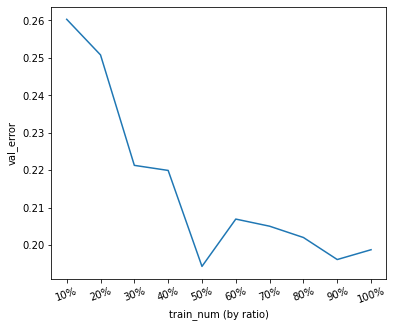

In [11]:
# plot
import matplotlib.pyplot as plt
ratio_val_res = np.array(ratio_val_res)
plt.figure(figsize=(6,5))
plt.plot((100 - ratio_val_res)/100)
plt.xticks([i for i in range(10)],[f"{i}%" for i in range(10,110,10)], rotation=20)
plt.xlabel('train_num (by ratio)')
plt.ylabel('val_error')
plt.savefig("./images/C5_val_error_vs_train_num")

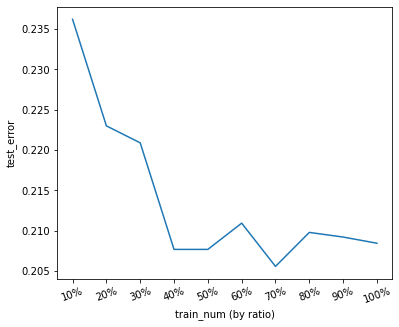

In [12]:
# plot
import matplotlib.pyplot as plt
ratio_test_res = np.array(ratio_test_res)
plt.figure(figsize=(6,5))
plt.plot((100 - ratio_test_res)/100)
plt.xticks([i for i in range(10)],[f"{i}%" for i in range(10,110,10)], rotation=20)
plt.xlabel('train_num (by ratio)')
plt.ylabel('test_error')
plt.savefig("./images/C5_test_error_vs_train_num")
# ratio from 0.1 to 1.0 with 0.1 step


# C6(c)
Apply Stochastic Gradient Descent to solve the optimization problem. Plot the five-fold crossvalidation training and test errors for the hypotheses obtained based on the solution α as a function of d, for the best value of C measured on the validation set.

## nu-svm (libsvm version)

In [215]:
# nu-svm
full_val_acc_res = []
full_test_acc_res = []
for d in range(1, 6):
    val_acc_res = []
    test_acc_res = []
    for c in C:
        print(c)
        test_acc_list = []
        val_acc_list = []
        for i in range(5):
            train_x_scaled_, val_x_scaled, train_y_scaled_, val_y_scaled = train_test_split(train_x_scaled, train_y_scaled, test_size=0.2)
            m = svm_train(train_y_scaled_, train_x_scaled_, f'-s 1 -t 1 -c {c} -d {d} -q')
            sv_len = m.get_sv_indices()
            sv_counts_list += [len(sv_len)]
            p_label, p_acc, p_val = svm_predict(val_y_scaled, val_x_scaled, m)
            val_acc_list += [p_acc[0]]
            p_label, p_acc, p_val = svm_predict(test_y_scaled, test_x_scaled, m)
            test_acc_list += [p_acc[0]]
        val_acc_res += [sum(val_acc_list)/5]
        test_acc_res += [sum(test_acc_list)/5]
    full_val_acc_res += [val_acc_res]
    full_test_acc_res += [test_acc_res]

1.6935087808430286e-05
Accuracy = 78.1499% (490/627) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 77.8309% (488/627) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 80.7018% (506/627) (classification)
Accuracy = 77.1073% (805/1044) (classification)
Accuracy = 78.4689% (492/627) (classification)
Accuracy = 76.9157% (803/1044) (classification)
Accuracy = 79.7448% (500/627) (classification)
Accuracy = 77.2989% (807/1044) (classification)
5.080526342529086e-05
Accuracy = 79.7448% (500/627) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 78.3094% (491/627) (classification)
Accuracy = 76.9157% (803/1044) (classification)
Accuracy = 80.7018% (506/627) (classification)
Accuracy = 76.8199% (802/1044) (classification)
Accuracy = 77.6715% (487/627) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 79.9043% (501/627) (classification)
Accuracy = 76.9157% (803/1044) (classification)
0.000

In [216]:
full_val_acc_res = np.array(full_val_acc_res)
full_test_acc_res = np.array(full_test_acc_res)

In [217]:
full_val_acc_res

array([[78.97926635, 79.26634769, 79.33014354, 80.12759171, 80.35087719,
        78.18181818, 78.24561404, 79.0430622 , 79.64912281, 78.27751196,
        80.15948963, 80.4784689 , 78.94736842, 78.18181818, 77.99043062,
        77.89473684, 79.55342903, 78.69218501, 79.36204147, 79.48963317],
       [80.9569378 , 79.13875598, 78.18181818, 77.86283892, 79.0430622 ,
        78.75598086, 79.39393939, 80.4784689 , 79.23444976, 78.88357257,
        78.46889952, 78.97926635, 80.25518341, 79.39393939, 79.01116427,
        78.40510367, 80.63795853, 79.87240829, 80.28708134, 78.14992026],
       [79.45773525, 80.57416268, 79.71291866, 79.84051037, 80.        ,
        79.45773525, 79.84051037, 80.15948963, 80.9569378 , 79.13875598,
        78.18181818, 80.28708134, 79.17065391, 79.77671451, 80.38277512,
        77.92663477, 80.92503987, 78.97926635, 79.71291866, 80.70175439],
       [76.84210526, 79.58532695, 81.21212121, 79.20255183, 78.43700159,
        79.01116427, 78.91547049, 79.71291866, 7

In [218]:
best_c_index = full_val_acc_res.argmax(axis=1)

In [219]:
# selec best c accordning to best val acc

In [220]:
select_test_acc = []
select_val_acc = []
for i in range(5):
    select_test_acc += [full_test_acc_res[i, best_c_index[i]]]
    select_val_acc += [full_val_acc_res[i, best_c_index[i]]]

In [221]:
best_c_index

array([11,  0,  8,  2, 18])

In [239]:
select_c = []
for i in range(5):
    select_c += [round(C[best_c_index[i]], 5)]
d_list = [1, 2, 3, 4, 5]
a = zip(select_c, d_list)

In [240]:
a

In [241]:
select_val_acc

[80.47846889952153,
 80.95693779904306,
 80.95693779904306,
 81.21212121212122,
 79.23444976076554]

([<matplotlib.axis.XTick at 0x7f6ce7e7d160>,
 [Text(0, 0, '(3.0, 1)'),
  Text(1, 0, '(2e-05, 2)'),
  Text(2, 0, '(0.11111, 3)'),
  Text(3, 0, '(0.00015, 4)'),
  Text(4, 0, '(6561.0, 5)')])

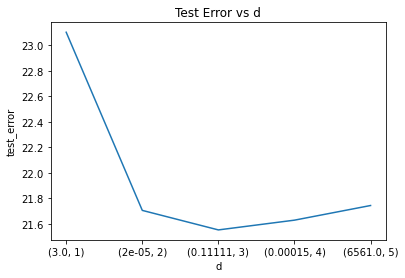

In [242]:
# plot d vs d
import matplotlib.pyplot as plt
select_test_acc = np.array(select_test_acc)
plt.plot(100 - select_test_acc)
plt.title('Test Error vs d')
plt.xlabel('d')
plt.ylabel('test_error')
plt.xticks([i for i in range(5)], a)

([<matplotlib.axis.XTick at 0x7f6ce7a9d820>,
 [Text(0, 0, '(3.0, 1)'),
  Text(1, 0, '(2e-05, 2)'),
  Text(2, 0, '(0.11111, 3)'),
  Text(3, 0, '(0.00015, 4)'),
  Text(4, 0, '(6561.0, 5)')])

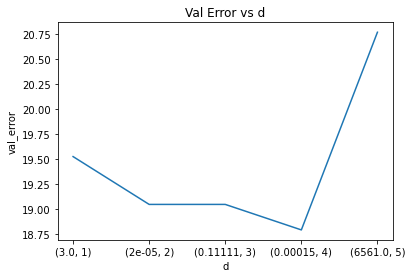

In [248]:
# plot d vs d
import matplotlib.pyplot as plt
select_val_acc = np.array(select_val_acc)
plt.plot(100 - select_val_acc)
# plt.legend(['d=1', 'd=2', 'd=3', 'd=4', 'd=5'])
plt.title('Val Error vs d')
plt.xlabel('d')
plt.ylabel('val_error')
a = zip(select_c, d_list)
plt.xticks([i for i in range(5)], a)

## nu-SVM (PyTorch version)

In [13]:
import numpy as np
from sklearn import linear_model

In [21]:
train_y_scaled, train_x_scaled = svm_read_problem('./cached_datasets/abalone_train_scaled', True)
test_y_scaled, test_x_scaled = svm_read_problem('./cached_datasets/abalone_test_scaled', True)

In [26]:
train_x_scaled = train_x_scaled.todense()
test_x_scaled = test_x_scaled.todense()

In [162]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.y[y==0] = -1

    def __getitem__(self, index):
        x = self.x[index]
        x = torch.tensor(x, dtype=torch.float).squeeze()
        y = self.y[index]
        y = torch.tensor(y, dtype=torch.float)
        return x, y, index

    def __len__(self):
        return len(self.x)

In [163]:
train_x_scaled_, val_x_scaled, train_y_scaled_, val_y_scaled = train_test_split(train_x_scaled, train_y_scaled, test_size=0.2)

In [164]:
train_dataset = MyDataset(train_x_scaled_, train_y_scaled_)
val_dataset = MyDataset(val_x_scaled, val_y_scaled)

In [165]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=1024, shuffle=True)
for batch in train_dataloader:
    x, y, idx = batch
    print(x.shape)
    print(y.shape)
    print(idx.shape)
    break

torch.Size([1024, 8])
torch.Size([1024])
torch.Size([1024])


In [166]:
class PolynomialKernel(torch.nn.Module):
    def __init__(self, c=1.0, degree=2):
        super(PolynomialKernel, self).__init__()
        self.c = torch.nn.parameter.Parameter(torch.tensor(c), requires_grad=False)
        self.degree = torch.nn.parameter.Parameter(torch.tensor(degree), requires_grad=False)

    def forward(self, x, w):
        w = w.view(w.size(0), -1).t()
        out = (x.matmul(w) + self.c) ** self.degree
        return out

In [195]:
import torch
class MyHingeLoss(torch.nn.Module):
    def __init__(self):
        super(MyHingeLoss, self).__init__()

    def forward(self, output, target):
        hinge_loss = 1 - torch.mul(output, target)
        hinge_loss = torch.clamp(hinge_loss, min=0)
        return hinge_loss

In [204]:
import torch
import torch.nn as nn
# import sklearn.metrics.pairwise.polynomial_kernel as polynomial_kernel
import sklearn

class nu_SVM(nn.Module):
    def __init__(self, m, c, d=2):
        super(nu_SVM, self).__init__()
        # m is the dataset number
        # self.svm = nn.Linear(8, 1, bias=True)
        self.w = nn.Parameter(torch.rand(8, 1))
        self.b = nn.Parameter(torch.rand(1))
        self.alpha = nn.Parameter(torch.rand(m))
        self.c = c
        self.hinge_loss = MyHingeLoss()
        # self.d = d
        self.kernel = PolynomialKernel(degree=d)
        self.linear = nn.Linear(8, 1)

    def svm(self, x):
        # with poly kernel
        x = torch.tensor(x)
    
    def pred(self, x, y):
        # svm pred
        pred = x @ self.w + self.b
        # pred = self.linear(x)
        pred[pred > 0] = 1
        pred[pred <= 0] = -1
        # print(y.shape)
        pred = pred.squeeze()
        acc = ((pred * y)>0).sum().item() / y.shape[0]
        # print(acc)
        return pred, acc

    def forward(self, x, y, idx):
        loss = self.lagrange_function(x, y, idx)
        return loss

    def lagrange_function(self, x, y, index):
        batch_size = x.shape[0]
        alpha = self.alpha[index]

        hinge_part = torch.clamp(1 - (alpha * (y.T @ y) * self.kernel(x,x)+self.b * y).sum(dim=1), min=0)
        l_score = 1/2 * torch.abs(alpha) + self.c * hinge_part
        loss = torch.mean(l_score)
        return loss

model = nu_SVM(train_x_scaled.shape[0], 4)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)
for i in range(1000000):
    for batch in train_dataloader:
        x, y, idx = batch
        optimizer.zero_grad()
        loss = model(x, y, idx)
        print(y)
        pred, acc = model.pred(x, y)
        print("acc",acc, "loss", loss)
        loss.backward()
        optimizer.step()

tensor([-1.,  1.,  1.,  ..., -1., -1., -1.])
acc 0.3954509177972865 loss tensor(0.2501, grad_fn=<MeanBackward0>)
tensor([-1.,  1.,  1.,  ..., -1., -1., -1.])
acc 0.3954509177972865 loss tensor(0.2501, grad_fn=<MeanBackward0>)
tensor([-1.,  1.,  1.,  ..., -1., -1., -1.])
acc 0.3954509177972865 loss tensor(0.2501, grad_fn=<MeanBackward0>)
tensor([-1.,  1.,  1.,  ..., -1., -1., -1.])
acc 0.3954509177972865 loss tensor(0.2501, grad_fn=<MeanBackward0>)
tensor([-1.,  1.,  1.,  ..., -1., -1., -1.])
acc 0.3954509177972865 loss tensor(0.2501, grad_fn=<MeanBackward0>)
tensor([-1.,  1.,  1.,  ..., -1., -1., -1.])
acc 0.3954509177972865 loss tensor(0.2500, grad_fn=<MeanBackward0>)
tensor([-1.,  1.,  1.,  ..., -1., -1., -1.])
acc 0.3954509177972865 loss tensor(0.2500, grad_fn=<MeanBackward0>)
tensor([-1.,  1.,  1.,  ..., -1., -1., -1.])
acc 0.3954509177972865 loss tensor(0.2500, grad_fn=<MeanBackward0>)
tensor([-1.,  1.,  1.,  ..., -1., -1., -1.])
acc 0.3954509177972865 loss tensor(0.2500, grad_fn=

KeyboardInterrupt: 

torch.Size([100, 8])
torch.Size([100])
torch.Size([100])


/tmp/ipykernel_2779854/2187075748.py:34: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646756402876/work/aten/src/ATen/native/TensorShape.cpp:2318.)
  (1 - (self.alpha * y.T @ y * sklearn.metrics.pairwise.polynomial_kernel(x, x, degree=self.d)+self.b * y), torch.tensor(0), dim=1)


RuntimeError: The size of tensor a (3133) must match the size of tensor b (100) at non-singleton dimension 0

In [194]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
# Y = np.array([1, 1, 2, 2])
# Always scale the input. The most convenient way is to use a pipeline.
X = train_x_scaled_
Y = train_y_scaled_
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=10, tol=1e-3))
clf.fit(X, Y)
acc = (clf.predict(X) == Y).sum() / len(Y)
print(acc)

0.7789305666400639


/home/xiangpan/.conda/envs/39/lib/python3.9/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/xiangpan/.conda/envs/39/lib/python3.9/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/xiangpan/.conda/envs/39/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/xiangpan/.conda/envs/39/lib/python3.9/site-packages/sklearn/utils/vali